# **DMML Assignment 1**

# **Task 2: Supermarket Sales**

submission by Utpalraj Kemprai(MDS202352)

In [171]:
# importing libraries for use
# python version 3.8.5
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report

### **Storing and reading first few rows of the SuperMarket Data**

In [172]:
data = pd.read_csv("supermarket-sales-data.csv")
data.head()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


In [173]:
data.dtypes

InvoiceID        object
Branch           object
CustomerType     object
Gender           object
ProductType      object
UnitPrice       float64
Quantity          int64
Tax             float64
Total           float64
PaymentType      object
Rating          float64
dtype: object

### Checking for missing values

In [174]:
data.isna().sum()

InvoiceID       0
Branch          0
CustomerType    0
Gender          0
ProductType     0
UnitPrice       0
Quantity        0
Tax             0
Total           0
PaymentType     0
Rating          0
dtype: int64

### Correlation Heat Map for Numerical Data

<AxesSubplot:>

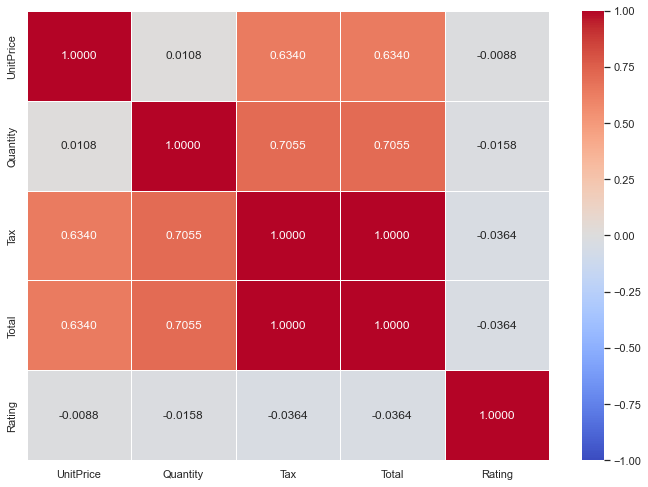

In [175]:
num_data = data.iloc[:,1:].select_dtypes(include = ["float64","int64"]) # InvoiceID is dropped as it is redundant for prediction
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(num_data.corr(),annot=True,cmap="coolwarm",linewidths=0.5,vmin=-1,vmax=1,fmt=".4f")

##### We see from the above heatmap that Tax and Total are perfectly correlated (correlation coefficient = 1). So in building a classfier we can drop one of Tax or Total with no loss of information.

### Encoding the non-numeric columns in the data

In [176]:
obj_columns = data.iloc[:,1:].select_dtypes(include=['object']).columns
obj_columns # columns of data with type object

Index(['Branch', 'CustomerType', 'Gender', 'ProductType', 'PaymentType'], dtype='object')

In [188]:
from sklearn.preprocessing import LabelEncoder
for col in obj_columns:
    enc = LabelEncoder()
    enc.fit(data[col].unique())
    data[col] = enc.transform(data[col])

In [189]:
# classes in the encoded columns 
data.head()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,0,0,0,3,74.69,7,26.1415,548.9715,2,9.1
1,226-31-3081,2,1,0,0,15.28,5,3.8200,80.2200,0,9.6
2,631-41-3108,0,1,1,4,46.33,7,16.2155,340.5255,1,7.4
3,123-19-1176,0,0,1,3,58.22,8,23.2880,489.0480,2,8.4
4,373-73-7910,0,1,1,5,86.31,7,30.2085,634.3785,2,5.3


In [190]:
data.dtypes

InvoiceID        object
Branch            int32
CustomerType      int32
Gender            int32
ProductType       int32
UnitPrice       float64
Quantity          int64
Tax             float64
Total           float64
PaymentType       int32
Rating          float64
dtype: object

#### In the data, gender columns male has been encoded as 1 and female as 0

In [191]:
data.describe()

,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.988000,0.499000,0.499000,2.452000,55.672130,5.510000,15.379369,322.966749,1.001000,6.97270
std,0.817633,0.500249,0.500249,1.715412,26.494628,2.923431,11.708825,245.885335,0.830475,1.71858
min,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,0.000000,4.00000
25%,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.924875,124.422375,0.000000,5.50000
50%,1.000000,0.000000,0.000000,2.000000,55.230000,5.000000,12.088000,253.848000,1.000000,7.00000
75%,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.445250,471.350250,2.000000,8.50000
max,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,49.650000,1042.650000,2.000000,10.00000


### Percentage of Male in given data

In [192]:
sum(data['Gender']==1)*100/len(data['Gender'])

49.9

In [386]:
data[data['Gender'] == 1].describe()

,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
count,499.000000,499.000000,499.0,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.941884,0.519038,1.0,2.460922,56.081944,5.292585,14.799487,310.789226,1.038076,6.980962
std,0.810715,0.500139,0.0,1.696907,25.794145,2.947084,11.524844,242.021730,0.838670,1.682146
min,0.000000,0.000000,1.0,0.000000,10.080000,1.000000,0.508500,10.678500,0.000000,4.000000
25%,0.000000,0.000000,1.0,1.000000,33.825000,3.000000,5.616500,117.946500,0.000000,5.600000
50%,1.000000,1.000000,1.0,2.000000,56.500000,5.000000,11.630000,244.230000,1.000000,6.900000
75%,2.000000,1.000000,1.0,4.000000,76.670000,8.000000,21.754000,456.834000,2.000000,8.450000
max,2.000000,1.000000,1.0,5.000000,99.960000,10.000000,49.490000,1039.290000,2.000000,10.000000


In [387]:
data[data['Gender'] == 0].describe()

,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
count,501.000000,501.000000,501.0,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,1.033932,0.479042,0.0,2.443114,55.263952,5.726547,15.956936,335.095659,0.964072,6.964471
std,0.822707,0.500060,0.0,1.735298,27.194037,2.886360,11.872591,249.324401,0.821405,1.755761
min,0.000000,0.000000,0.0,0.000000,10.160000,1.000000,0.604500,12.694500,0.000000,4.000000
25%,0.000000,0.000000,0.0,1.000000,30.620000,3.000000,6.322000,132.762000,0.000000,5.400000
50%,1.000000,0.000000,0.0,2.000000,54.070000,6.000000,12.980000,272.580000,1.000000,7.100000
75%,2.000000,1.000000,0.0,4.000000,78.880000,8.000000,23.164000,486.444000,2.000000,8.500000
max,2.000000,1.000000,0.0,5.000000,99.730000,10.000000,49.650000,1042.650000,2.000000,10.000000


### **Splitting the data into training and testing data**

In [193]:
from sklearn.model_selection import train_test_split
pred_cols = []
for col in data.columns:
    if col not in ['Gender','InvoiceID','Tax']: # Tax dropped as it has perfect correlation with Total
        pred_cols.append(col)
Xg = data[pred_cols] # features to predict from
yg = data['Gender'] # label to predict
Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg,yg,test_size=0.20,random_state=42) # splits 20% for test and 80% for training

## **1. Building a classifier to predict Gender**

### **1.a. Using a Decision Tree Classifier**

In [194]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [378]:
parameters_dtc = {}
parameters_dtc['criterion'] = ['gini']
parameters_dtc['max_depth'] = [3,5,7,9,11,None]
parameters_dtc['max_features'] = ['log2','sqrt',None]
parameters_dtc['random_state'] = [0]

#### Hyperparametric Tuning

In [379]:
from sklearn.model_selection import GridSearchCV
dtc_gender = GridSearchCV(dtc,param_grid=parameters_dtc,cv=3,n_jobs=-1,verbose=3,scoring='accuracy')

#### Fitting the data

In [380]:
dtc_gender.fit(Xg_train,yg_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 7, 9, 11, None],
                         'max_features': ['log2', 'sqrt', None],
                         'random_state': [0]},
             scoring='accuracy', verbose=3)

#### Visualizing the Tree

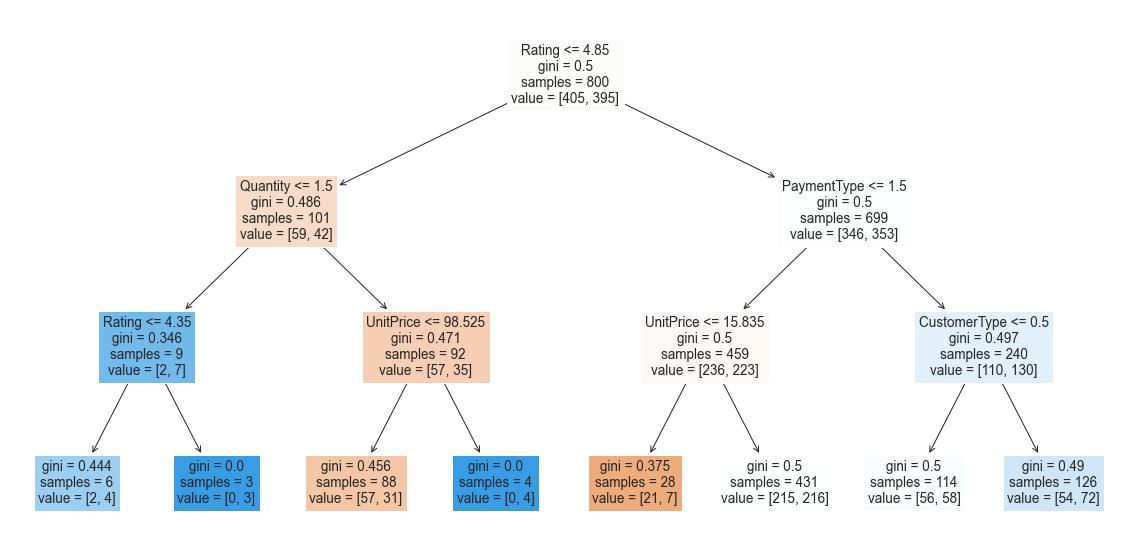

In [384]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
_ = plot_tree(dtc_gender.best_estimator_,feature_names=list(Xg.columns),filled=True)


#### The best parameters found and Accuracy on the training data

In [388]:
dtc_gender.best_params_ # best parameters

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'random_state': 0}

In [389]:
dtc_gender.best_score_ # best score

0.5337454122196877

#### Accurcy on the Test Data

In [390]:
dtc_gender.score(Xg_test,yg_test)

0.535

#### Confusion Matrix

In [391]:
confusion_matrix(y_true=yg_test,y_pred=dtc_gender.predict(Xg_test))

array([[20, 76],
       [17, 87]], dtype=int64)

#### Accuracy, F score, Precision and Recall

In [392]:
lab = ['Accuracy','F Score','Precision','Recall']
score = [dtc_gender.score(Xg_test,yg_test),f1_score(yg_test,dtc_gender.predict(Xg_test)),
         precision_score(yg_test,dtc_gender.predict(Xg_test)),recall_score(yg_test,dtc_gender.predict(Xg_test))]
dtctest = pd.DataFrame((zip(lab,score)),columns=["Metric","score"])
dtctest

,Metric,score
0,Accuracy,0.535000
1,F Score,0.651685
2,Precision,0.533742
3,Recall,0.836538


### **1.b. Using a Random Forest Classifier**

In [393]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [394]:
parameters_rfc = {}
parameters_rfc['n_estimators'] = [50,75,100,125,150,175,200,225]
parameters_rfc['criterion'] = ['gini']
parameters_rfc['max_features'] = ["log2","sqrt",None]
parameters_rfc['max_depth'] = [3,5,7,9,11,None]
parameters_rfc['random_state'] = [0]

#### Fitting the data with Hyperparametric Tuning

In [395]:
rfc_gender = GridSearchCV(rfc,param_grid=parameters_rfc,n_jobs=-1,cv=3,scoring='accuracy',verbose=3)
rfc_gender.fit(Xg_train,yg_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 7, 9, 11, None],
                         'max_features': ['log2', 'sqrt', None],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200, 225],
                         'random_state': [0]},
             scoring='accuracy', verbose=3)

#### Best parameters and score on the training data 

In [396]:
rfc_gender.best_score_

0.5475157932283893

In [397]:
rfc_gender.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 100,
 'random_state': 0}

#### Accuracy on the test data

In [398]:
rfc_gender.score(Xg_test,yg_test)

0.505

#### Confusion Matrix

In [399]:
confusion_matrix(yg_test,rfc_gender.predict(Xg_test))

array([[62, 34],
       [65, 39]], dtype=int64)

#### F score, Accuracy, Precision and Recall

In [400]:
lab = ['Accuracy','F Score','Precision','Recall']
score = [rfc_gender.score(Xg_test,yg_test),f1_score(yg_test,rfc_gender.predict(Xg_test)),
         precision_score(yg_test,rfc_gender.predict(Xg_test)),recall_score(yg_test,rfc_gender.predict(Xg_test))]
rfctest = pd.DataFrame((zip(lab,score)),columns=["Metric","score"])
rfctest

,Metric,score
0,Accuracy,0.505000
1,F Score,0.440678
2,Precision,0.534247
3,Recall,0.375000


### Comparing the results

Decision Tree

In [401]:
print("Decision Tree")
print(classification_report(yg_test,dtc_gender.predict(Xg_test),target_names=['Female','Male']))

Decision Tree
              precision    recall  f1-score   support

      Female       0.54      0.21      0.30        96
        Male       0.53      0.84      0.65       104

    accuracy                           0.54       200
   macro avg       0.54      0.52      0.48       200
weighted avg       0.54      0.54      0.48       200



Random Forest

In [402]:
print("Random Forest")
print(classification_report(yg_test,rfc_gender.predict(Xg_test),target_names=['Female','Male']))

Random Forest
              precision    recall  f1-score   support

      Female       0.49      0.65      0.56        96
        Male       0.53      0.38      0.44       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



## **2. Building a model to predict Rating**

Setting up the data for predicting Ratings

In [403]:
pred_cols = []
for col in data.columns:
    if col not in ['Rating','InvoiceID','Tax']: # Tax dropped as it has perfect correlation with Total
        pred_cols.append(col)
Xr = data[pred_cols] # features to predict from
yr = data['Rating'] # label to predict

In [404]:
yr.describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

### Splitting data for training and testimg

In [405]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr,yr,test_size=0.20,random_state=42) # splits 20% for test and 80% for training

In [406]:
pred_cols

['Branch',
 'CustomerType',
 'Gender',
 'ProductType',
 'UnitPrice',
 'Quantity',
 'Total',
 'PaymentType']

### **2.a. Using Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lm = LinearRegression()

In [ ]:
clf = RandomForestClassifier(n_estimators=150)


array([ 0.00535223,  0.06056411, -0.00120824])

In [ ]:
lmr.intercept_

6.74960290336308

In [ ]:
lmr.score(Xr_test,yr_test)

-0.0023042007040376955

In [ ]:
lmr.score(Xr_train,yr_train)

0.004300435477046172